<a href="https://colab.research.google.com/github/Zainab94-web/SCAMP-Cohort4-Technical-assessment/blob/master/Bank_Customer_Data_EDA_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing relevant python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('BankCustomerData.csv.zip')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes
42638,32,management,single,tertiary,no,1962,no,no,cellular,13,jan,130,1,-1,0,unknown,no


df.shape

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

In [ ]:
def title_simplifier(title):
    if 'entrepreneur'in title.lower():
        return "entreprenuer"
    elif 'blue collar' in title.lower():
        return 'blue collar'
    elif 'management' in title.lower():
        return 'management'
    elif 'technician' in title.lower():
        return 'technician'
    elif 'student' in title.lower():
        return 'student'
    elif 'retired' in title.lower():
        return 'retired'
    else:
        return 'na'
    
    

In [ ]:
df['job_simp']= df['job'].apply(title_simplifier)

In [ ]:
df.job_simp.value_counts()

na              22514
management       8851
technician       7223
retired          1880
entreprenuer     1453
student           718
Name: job_simp, dtype: int64

In [ ]:
#education count
df['education']  

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
5         tertiary
6         tertiary
7         tertiary
8          primary
9        secondary
10       secondary
11       secondary
12       secondary
13         unknown
14       secondary
15         primary
16         unknown
17         primary
18         primary
19       secondary
20       secondary
21        tertiary
22         primary
23       secondary
24         primary
25       secondary
26        tertiary
27       secondary
28       secondary
29       secondary
           ...    
42609     tertiary
42610     tertiary
42611    secondary
42612      primary
42613     tertiary
42614     tertiary
42615     tertiary
42616      unknown
42617      primary
42618     tertiary
42619      unknown
42620    secondary
42621     tertiary
42622     tertiary
42623     tertiary
42624    secondary
42625     tertiary
42626    secondary
42627    secondary
42628    secondary
42629    secondary
42630     te

In [ ]:
def title_simplifier(title):
    if 'primary' in title.lower():
        return 'primary'
    elif 'secondary' in title.lower():
        return 'secondary'
    elif 'tertiary' in title.lower():
        return 'tertiary'
    else:
        return 'na'
                        
     

In [ ]:
df['education_simp']= df['education'].apply(title_simplifier)

In [ ]:
df.education_simp.value_counts()

secondary    22066
tertiary     12302
primary       6581
na            1690
Name: education_simp, dtype: int64

In [ ]:
def title_simplifier(title):
    if 'married' in title.lower():
        return 'married'
    elif 'single' in title.lower():
        return 'single'
    elif 'divorced' in title.lower():
        return 'divorced'
    else:
        return 'na'
                   

In [ ]:
df['marital_simp']= df['marital'].apply(title_simplifier)
df.marital_simp.value_counts()

married     25868
single      11806
divorced     4965
Name: marital_simp, dtype: int64

In [ ]:
#housing description length
df['desc_len'] =df['housing'].apply(lambda x:len(x)) 
df['desc_len']

0        3
1        3
2        3
3        3
4        2
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
42609    2
42610    2
42611    3
42612    2
42613    2
42614    2
42615    2
42616    2
42617    2
42618    3
42619    2
42620    2
42621    2
42622    2
42623    2
42624    2
42625    2
42626    2
42627    2
42628    2
42629    2
42630    2
42631    2
42632    2
42633    3
42634    2
42635    2
42636    2
42637    2
42638    2
Name: desc_len, Length: 42639, dtype: int64

In [ ]:
#pdays count to balance
df['balance'] = df.apply(lambda x: x.balance if x.pdays ==1 else x.balance, axis = 1)
df[['pdays','balance']]                                   

,pdays,balance
0,-1,2143
1,-1,29
2,-1,2
3,-1,1506
4,-1,1
5,-1,231
6,-1,447
7,-1,2
8,-1,121
9,-1,593


In [ ]:
df[df.pdays ==1][['pdays','balance']] 

,pdays,balance
29778,1,201
30788,1,122
34437,1,640


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,desc_len
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442,2.576702
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705,0.494088
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000,2.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000,3.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'job_simp', 'education_simp',
       'marital_simp', 'desc_len'],
      dtype='object')

In [ ]:
df.marital.hist()

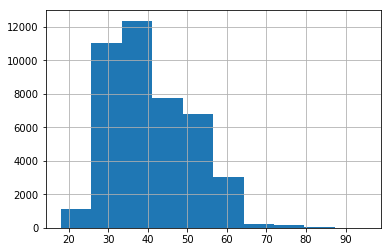

In [ ]:
df.age.hist()

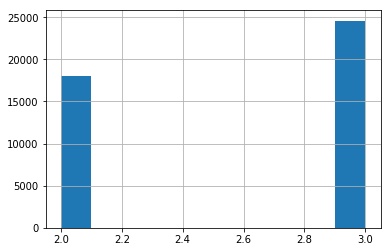

In [ ]:
df.desc_len.hist()

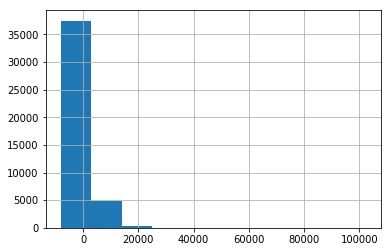

In [ ]:
df.balance.hist()

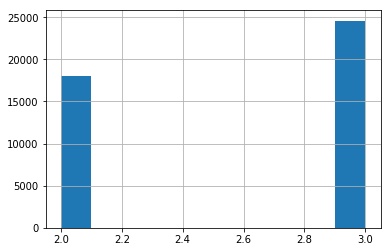

In [ ]:
df.desc_len.hist()

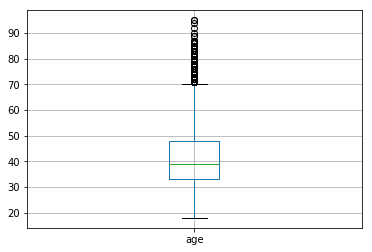

In [ ]:
df.boxplot(column = 'age')

In [ ]:
#correlation of age,job and balance
df[['age','balance','job','desc_len']].corr()

,age,balance,desc_len
age,1.000000,0.088716,-0.186888
balance,0.088716,1.000000,-0.063013
desc_len,-0.186888,-0.063013,1.000000


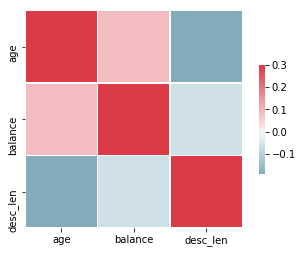

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','balance','desc_len']].corr(),vmax=.3, center=0,cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink":.5})
            

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'job_simp', 'education_simp',
       'marital_simp', 'desc_len'],
      dtype='object')

In [ ]:
df_cat=df[['education','job','housing','marital','loan','campaign','duration','pdays','duration','poutcome','term_deposit','contact','previous','default']]

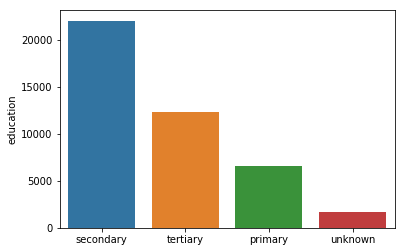

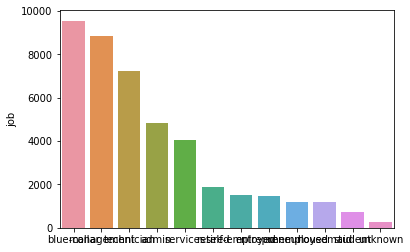

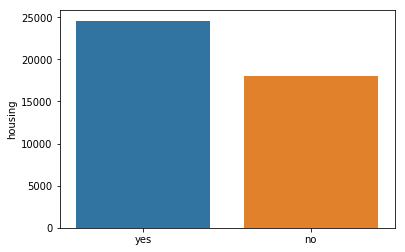

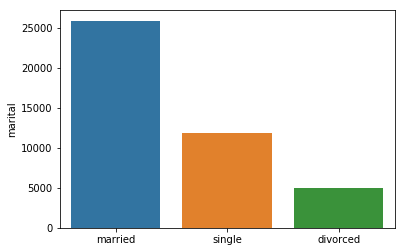

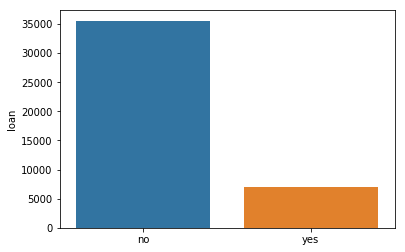

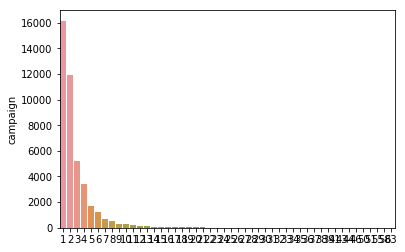

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
for i in df_cat.columns:
    cat_num= df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()
    

graph for education: total= 4


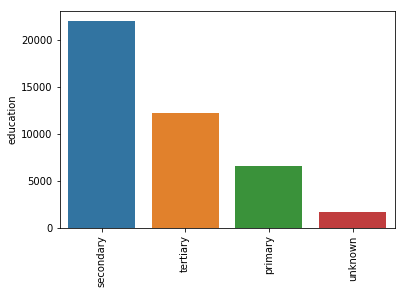

graph for job: total= 12


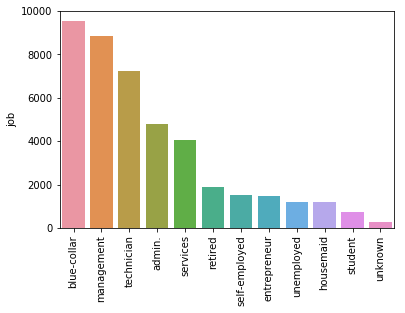

graph for housing: total= 2


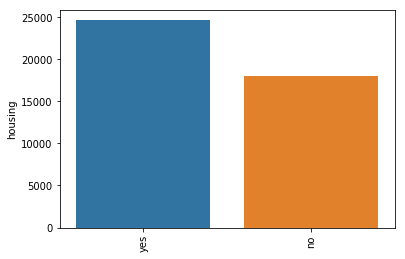

graph for marital: total= 3


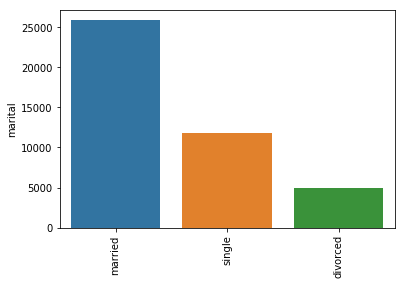

graph for loan: total= 2


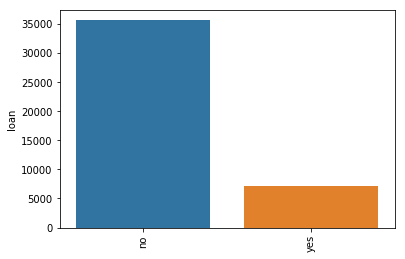

graph for campaign: total= 48


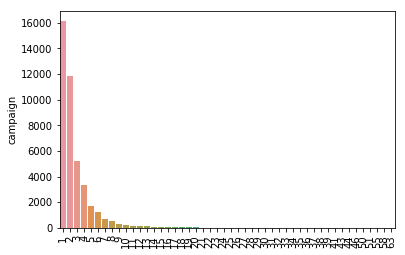

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
#cleaning up the barchat
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total= %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for campaign: total= 20


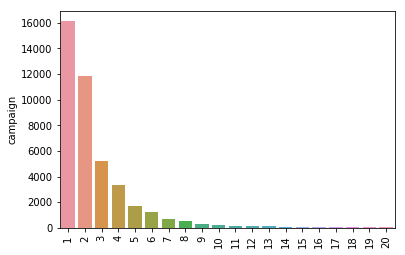

graph for job: total= 12


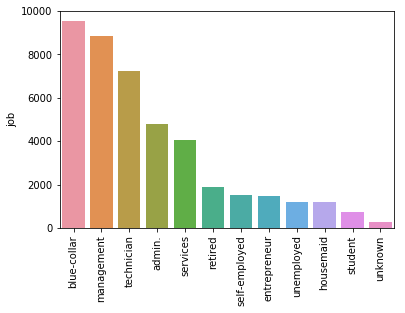

graph for default: total= 2


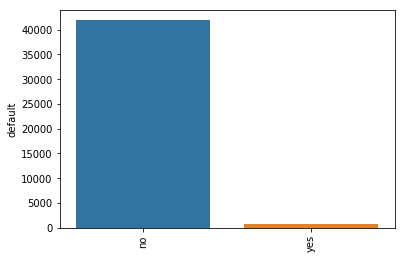

In [ ]:
#cleaning up the barchat
for i in df_cat[['campaign','job','default']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total= %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'job_simp', 'education_simp',
       'marital_simp', 'desc_len'],
      dtype='object')

In [ ]:
pd.pivot_table(df, index='job_simp', values ='balance')

,balance
job_simp,
entreprenuer,1508.063317
management,1741.707265
na,1150.188238
retired,1797.202128
student,1375.831476
technician,1234.993078


In [ ]:
pd.pivot_table(df, index=['job_simp','education'], values ='balance')

balance
job_simp     education             
entreprenuer primary    1675.362637
             secondary  1038.973384
             tertiary   1826.176383
             unknown    1553.789474
management   primary    1648.327586
             secondary  1329.842593
             tertiary   1808.699491
             unknown    1669.295238
na           primary    1106.389278
             secondary  1080.450411
             tertiary   1608.447355
             unknown    1458.697409
retired      primary    1665.519380
             secondary  1854.044686
             tertiary   2037.000000
             unknown    1408.284211
student      primary    1466.906250
             secondary  1263.859008
             tertiary   1491.721925
             unknown    1533.586207
technician   primary    1454.660131
             secondary  1113.486006
             tertiary   1495.972826
             unknown    1647.127193

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [ ]:
pd.pivot_table(df, index='job_simp', values ='balance').sort_values('balance',ascending= False)

,balance
job_simp,
retired,1797.202128
management,1741.707265
entreprenuer,1508.063317
student,1375.831476
technician,1234.993078
na,1150.188238


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'job_simp', 'education_simp',
       'marital_simp', 'desc_len'],
      dtype='object')

In [ ]:
#term_deposit,poutcome,contact, day, month

In [ ]:
df_pivots =df[['term_deposit','month','day','poutcome','duration']]

In [ ]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index= i, values = 'duration').sort_values('duration', ascending = True))

term_deposit
                duration
term_deposit            
no            221.441853
yes           592.992679
month
         duration
month            
mar    221.643411
aug    230.065308
jun    240.775351
feb    240.957753
nov    251.748909
may    259.952114
jul    266.144831
jan    269.133987
oct    292.083012
apr    296.157101
sep    297.063830
dec    329.327103
day
       duration
day            
31   176.063107
27   218.871845
28   222.516744
26   229.654095
20   234.129116
29   238.653358
18   240.673241
2    244.204184
9    244.714973
25   248.359684
8    251.169757
11   253.035817
21   259.254417
6    259.344022
22   260.951691
19   261.284714
14   261.350058
4    262.397158
12   266.688391
23   268.106184
7    271.072952
5    271.075851
3    271.451485
15   272.368987
17   273.665250
13   274.006766
30   276.965086
10   283.155361
1    284.812766
24   285.709845
16   294.928410
poutcome
            duration
poutcome            
failure   238.651136
other     249.301252
unkn

ValueError: Grouper for 'duration' not 1-dimensional

In [ ]:
Zainab. Welldone I must say I am impressed at your presentation, I love the fact, you explored different palettes
I am curious though as to why you used function title_simplifier